In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plt.rcParams.update(params)

We recorded a playthrough of a player playing Dead Target from level 1 to see how the money was spent, gain and how player skill progressed. You can see the data in the table below.

> - `Profit = Receive + Quests + Rank Rewards - Spent`
> - `Headshot = Headshot bonus / 3`

In [2]:
df = pd.read_csv("deadtarget.csv")
df = df.set_index("Level")
df.head(8)

Bullet  Bullet value  Spent Ammo  Spent Gun  Spent  Headshot  \
Level                                                                 
1          12           0.0           0          0      0         9   
2         111         133.2          36      11000  11036        30   
3         195         234.0           0          0      0        83   
4         127         152.4         108          0    108        92   
5         196         235.2         216          0    216        88   
6         441         529.2         576      12000  12576       240   
7         214         256.8         216          0    216       130   
8         395         474.0           0          0      0       208   

       Headshot bonus  Combo kill bonus  Item Drops  Receive  Quests  \
Level                                                                  
1                  27                15         600     3642     900   
2                  90               100         180      822     400   
3                 249               220          60     1229     400   
4                 276               250         360     1386     400   
5                 264               195          86     1279     800   
6                 720               155         930     2805       0   
7                 390               240        3540     4770       0   
8                 624               150         840     2414     500   

       Rank Rewards  Profit  Rank Points  Gold  Rank Gold  Grenade Reward  \
Level                                                                       
1              1000    5542            3     1          5               2   
2                 0   -9814            1     1          0               0   
3                 0    1629            1     1          0               0   
4                 0    1678            1     1          0               0   
5              1500    3363            2     2          5               0   
6                 0   -9771            0     3          0               0   
7                 0    4554            0     1          0               0   
8                 0    2914            1     2          0               0   

       Zombies  Weapon Unlock  
Level                          
1           12              1  
2           30              0  
3           60              0  
4           60              0  
5           49              0  
6           47              0  
7           58              0  
8           48              0

# Accuracy Curve

Except for boss fight, there are only 2 skills player can improve in the game:
- Decide when and where to shoot - in order to survive and not be overwhelmed.
- Shooting accuracy - in order to earn more money and kill zombies faster.

Out of two, we are only able to measure the accuracy progession of a player. Since there are multiple type of zombies, using zombies/bullet wouldn't yeild what we were looking for. Instead, we used headshot count received by dividing headshot bonus by 3.

As we can see in the graph below, player accuracy increases significantly until level 4 and stop increasing from there. Basically, from this point, the only thing player do to improve is buying better guns.
> One thing to note here is that we lack data of later levels so the conclusion may not be that accurate.

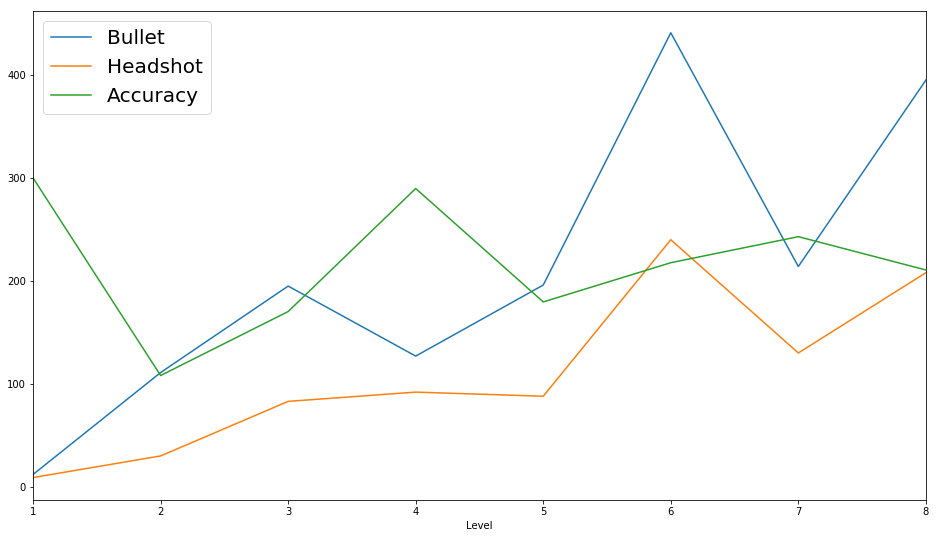

In [21]:
headshot = df[["Bullet", "Headshot"]].copy()
headshot["Accuracy"] = 400 * headshot["Headshot"] / headshot["Bullet"]
headshot.plot(figsize=(16, 9))
plt.show()

> The accuracy value is scaled up 400 times so that we can see it better.

# Spend and Profit

In the first 8 levels, 
- The money spent on ammo is very small in comparision to other spending or recieving amount.
- Money earned from player skill (bonuses and quests) is insignificant, meaning that player performance is pretty meaningless.
- Player is spending more than receiving, yet his balance is still rising only thanks to casino spin. Eventually, the only thing that matter is how much you earn from casino spinning.
- One interesting design here is that as soon as player's accuracy decreased greatly in level 5 where the zombie wave is much more intensive, player is suggested to upgrade his gun in level 6. However, the accuracy is not increased after that.

In [4]:
money = df[["Spent Ammo", "Spent", "Profit"]].copy()
money["Income"] = df["Receive"] +  df["Quests"] + df["Rank Rewards"]
money["Bonuses"] = df["Headshot bonus"] + df["Combo kill bonus"] + df["Quests"]
money = money.cumsum()
money["Accuracy"] = headshot["Accuracy"] * 50
money = money[["Income", "Spent", "Profit", "Bonuses", "Spent Ammo", "Accuracy"]]
money.head(8)

Income  Spent  Profit  Bonuses  Spent Ammo      Accuracy
Level                                                          
1        5542      0    5542      942           0  15000.000000
2        6764  11036   -4272     1532          36   5405.405405
3        8393  11036   -2643     2401          36   8512.820513
4       10179  11144    -965     3327         144  14488.188976
5       13758  11360    2398     4586         360   8979.591837
6       16563  23936   -7373     5461         936  10884.353741
7       21333  24152   -2819     6091        1152  12149.532710
8       24247  24152      95     7365        1152  10531.645570

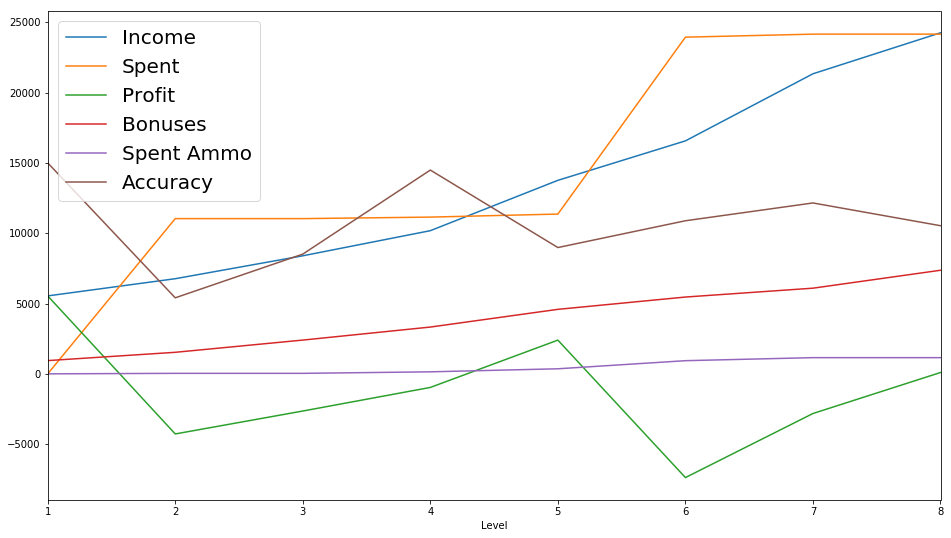

In [5]:
money.plot(figsize=(16, 9))
plt.show()